<a href="https://colab.research.google.com/github/IrigoyenCodes/Artificial-Intelligence/blob/main/cnnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
mnist.load_data

<function keras.src.datasets.mnist.load_data(path='mnist.npz')>

In [ ]:
# 1. Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.10, ),

    layers.Dense(10, activation='softmax')

    ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8106 - loss: 2.5116 - val_accuracy: 0.9708 - val_loss: 0.1039
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9664 - loss: 0.1114 - val_accuracy: 0.9753 - val_loss: 0.0929
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9749 - loss: 0.0804 - val_accuracy: 0.9790 - val_loss: 0.0756
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9813 - loss: 0.0616 - val_accuracy: 0.9784 - val_loss: 0.0813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9844 - loss: 0.0502 - val_accuracy: 0.9807 - val_loss: 0.0750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.9771 - val_loss: 0.0996
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9901 - loss: 0.0329 - val_accuracy: 0.9795 - val_loss: 0.0962
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.9899 - loss: 0.03

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9981 - loss: 0.0058 - val_accuracy: 0.9983 - val_loss: 0.0054
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9979 - loss: 0.0065 - val_accuracy: 0.9982 - val_loss: 0.0062
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.9980 - loss: 0.0068 - val_accuracy: 0.9977 - val_loss: 0.0088
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.9978 - loss: 0.0075 - val_accuracy: 0.9975 - val_loss: 0.0092
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.9963 - val_loss: 0.0114


Test accuracy: 0.9829
Test accuracy: 0.9829


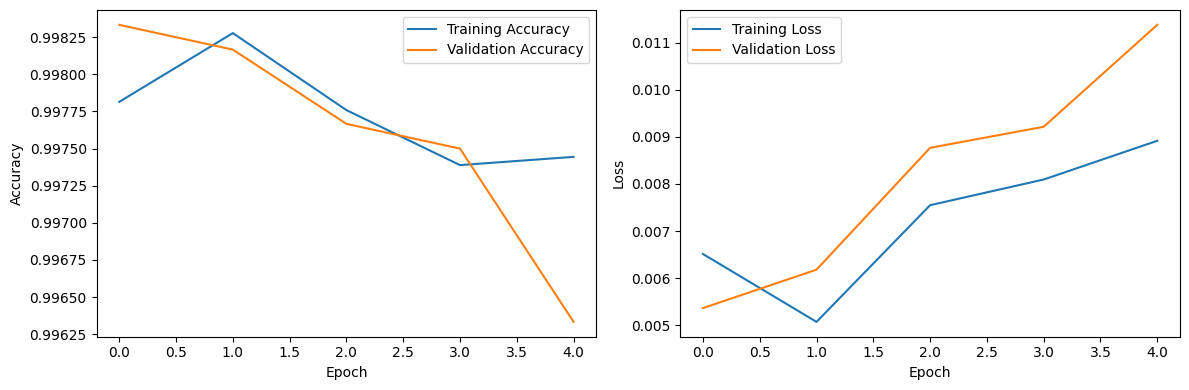

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# 5. Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

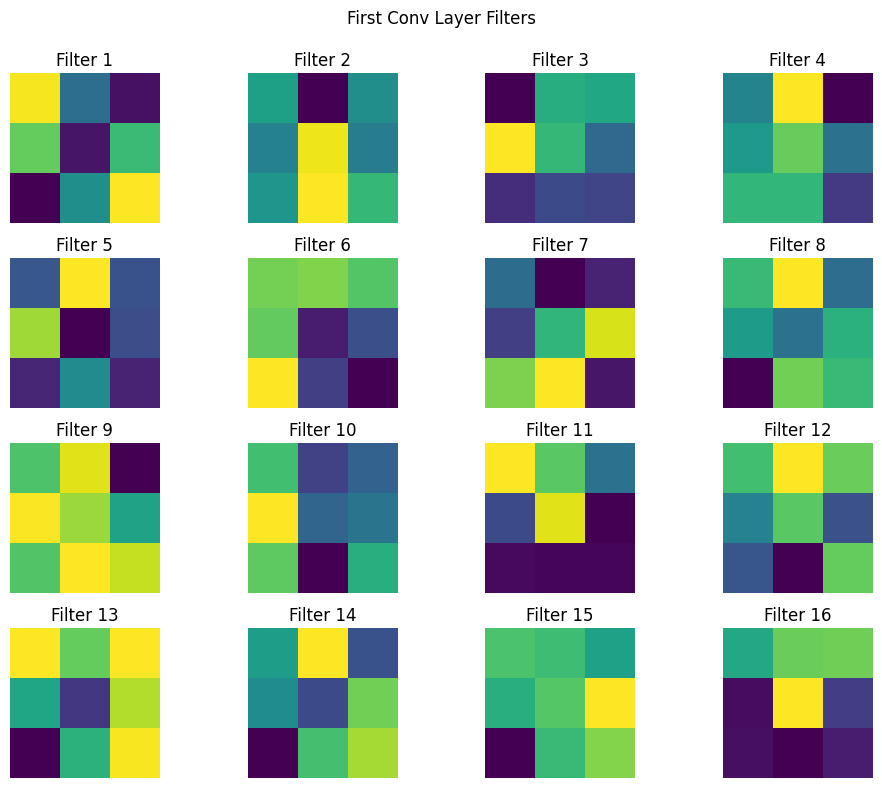

In [ ]:
def visualize_filters():
    # Get the weights of the first convolutional layer
    filters = model.layers[0].get_weights()[0]

    # Normalize filter values to 0-1 for visualization
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # Plot first 16 filters
    plt.figure(figsize=(10, 8))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(filters[:, :, 0, i], cmap='viridis')
        plt.axis('off')
        plt.title(f'Filter {i+1}')
    plt.tight_layout()
    plt.suptitle('First Conv Layer Filters')
    plt.subplots_adjust(top=0.9)
    plt.show()

visualize_filters()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


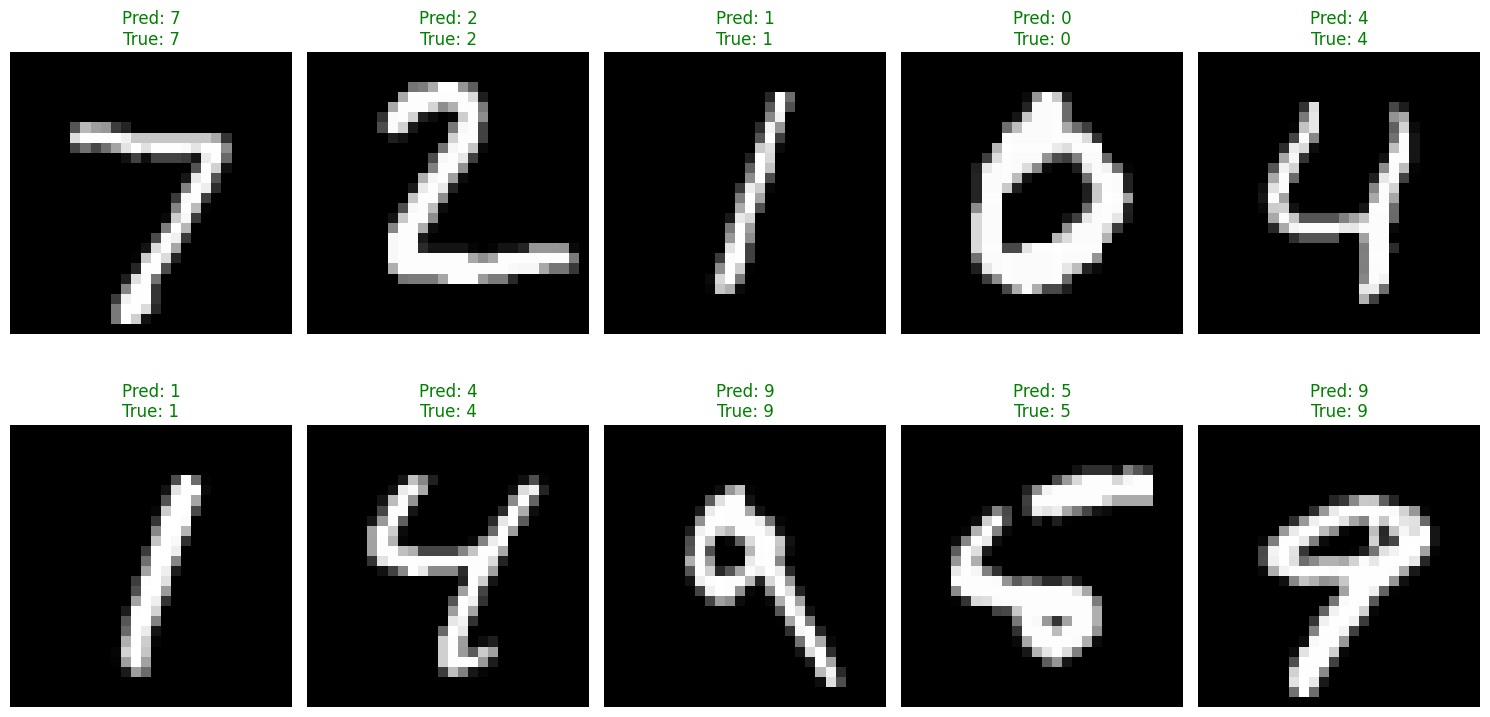

In [ ]:

# 7. Make some predictions and visualize results
def show_predictions():
    # Get predictions
    predictions = model.predict(X_test[:10])
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test[:10], axis=1)

    # Display images and predictions
    plt.figure(figsize=(15, 8))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
        plt.title(f"Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions()